# Task #1

# Part I

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, log_loss
from sklearn.metrics import precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/Users/ucheba/Desktop/ITMO/MLT/task1/bioresponse.csv')

In [2]:
data.shape

(3751, 1777)

In [3]:
X = data.drop('Activity', axis=1)
y = data['Activity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [4]:
# Small decision tree
small_tree = DecisionTreeClassifier(max_depth=3)
small_tree.fit(X_train, y_train)

# Deep decision tree
deep_tree = DecisionTreeClassifier(max_depth=None)  # Nodes are expanded until all leaves are pure
deep_tree.fit(X_train, y_train)

# Random forest on small trees
small_rf = RandomForestClassifier(n_estimators=100, max_depth=3)
small_rf.fit(X_train, y_train)

# Random forest on deep trees
deep_rf = RandomForestClassifier(n_estimators=100, max_depth=None)
deep_rf.fit(X_train, y_train)

RandomForestClassifier()

# Part II

In [5]:
models = [small_tree, deep_tree, small_rf, deep_rf]
names = ["Small Tree", "Deep Tree", "RF on Small Trees", "RF on Deep Trees"]

for name, model in zip(names, models):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    print(name)
    print('Precision:', precision_score(y_test, y_pred))
    print('Recall:', recall_score(y_test, y_pred))
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('F1-score:', f1_score(y_test, y_pred))
    print('Log-loss:', log_loss(y_test, y_pred_proba))
    print('---------------------')

Small Tree
Precision: 0.7853211009174312
Recall: 0.8
Accuracy: 0.7611940298507462
F1-score: 0.7925925925925926
Log-loss: 0.5401985811560338
---------------------
Deep Tree
Precision: 0.7549019607843137
Recall: 0.719626168224299
Accuracy: 0.7068230277185501
F1-score: 0.736842105263158
Log-loss: 10.126080445926666
---------------------
RF on Small Trees
Precision: 0.7513611615245009
Recall: 0.7738317757009345
Accuracy: 0.7249466950959488
F1-score: 0.7624309392265193
Log-loss: 0.5993833284989333
---------------------
RF on Deep Trees
Precision: 0.822550831792976
Recall: 0.8317757009345794
Accuracy: 0.8017057569296375
F1-score: 0.8271375464684015
Log-loss: 0.4615803965909111
---------------------


# Part III

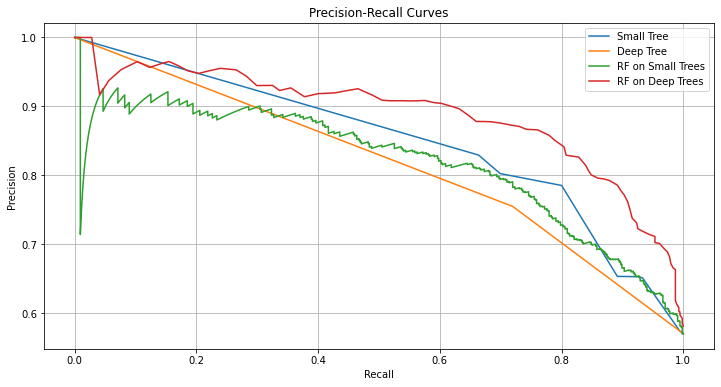

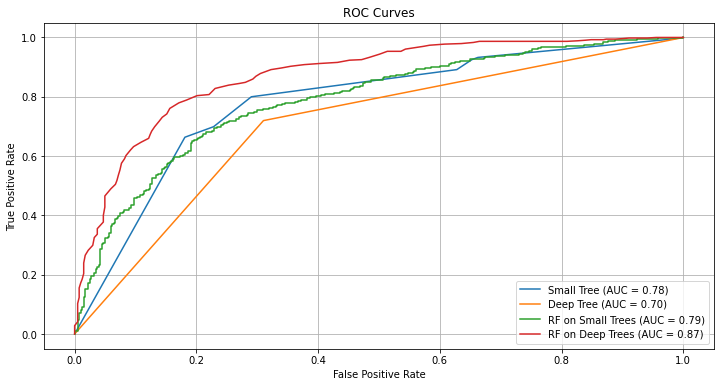

In [6]:
# Precision-Recall curves
plt.figure(figsize=(12, 6))

for name, model in zip(names, models):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    plt.plot(recall, precision, label=name)

plt.title('Precision-Recall Curves')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()

# ROC curves
plt.figure(figsize=(12, 6))

for name, model in zip(names, models):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

# Part IV

This part is to get Recall as high as possible, starting from threshold 0.1

In [8]:
# Train a RandomForest classifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

y_pred_probs = clf.predict_proba(X_test)[:, 1]

# Adjust threshold to achieve desired recall
threshold = 0.1
y_pred = y_pred_probs > threshold
while recall_score(y_test, y_pred) < 0.95 and threshold < 1.0:
    threshold += 0.01
    y_pred = y_pred_probs > threshold

print(f"Threshold adjusted to: {threshold}")

# Calculate metrics
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred))
print('Log-loss:', log_loss(y_test, y_pred_probs))


Threshold adjusted to: 0.1
Precision: 0.5924276169265034
Recall: 0.994392523364486
Accuracy: 0.6066098081023454
F1-score: 0.7424982554082346
Log-loss: 0.4611116654376688


This part is to get threshold above 0.95, but do not forget about other metrics

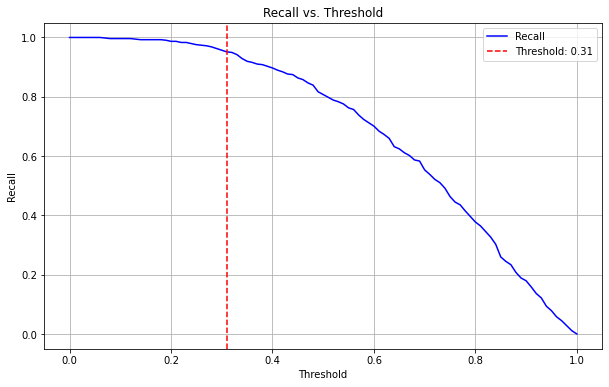

Threshold: 0.31
Precision: 0.7049861495844876
Recall: 0.9514018691588785
Accuracy: 0.7452025586353944
F1-score: 0.8098647573587908
Log-loss: 0.4596073225305391


In [9]:
import numpy as np

# Train a RandomForest classifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

y_pred_probs = clf.predict_proba(X_test)[:, 1]

thresholds = np.arange(0, 1.01, 0.01)
recalls = []

for threshold in thresholds:
    y_pred = y_pred_probs > threshold
    recalls.append(recall_score(y_test, y_pred))

# Find the threshold where recall is closest to but not less than 0.95
thresholds_above_95 = [thresholds[i] for i, recall in enumerate(recalls) if recall >= 0.95]
closest_threshold = min(thresholds_above_95, key=lambda x: abs(x-0.95))

plt.figure(figsize=(10, 6))
plt.plot(thresholds, recalls, '-b', label='Recall')
plt.axvline(closest_threshold, color='r', linestyle='--', label=f"Threshold: {closest_threshold:.2f}")
plt.xlabel('Threshold')
plt.ylabel('Recall')
plt.title('Recall vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()

y_pred = y_pred_probs > closest_threshold

# Calculate metrics
print('Threshold:', closest_threshold)
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred))
print('Log-loss:', log_loss(y_test, y_pred_probs))

We see significant improvements in Precision and Accuracy compared to the previous results